In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.preprocessing import image

from tensorflow.keras.models import Sequential


In [2]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  'spl/train',
  validation_split=0.2,
  subset="training",
  seed=123,
  )

Found 5212 files belonging to 3 classes.
Using 4170 files for training.


In [3]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  'spl/test',
  validation_split=0.2,
  subset="validation",
  seed=123)

Found 624 files belonging to 3 classes.
Using 124 files for validation.


In [4]:
class_names = train_ds.class_names
print(class_names)

['BACTERIA', 'NORMAL', 'VIRUS']


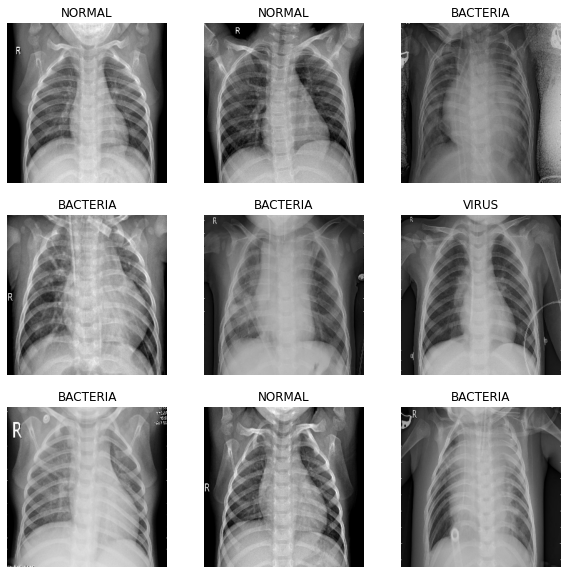

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [6]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 256, 256, 3)
(32,)


In [7]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [8]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.9998469


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [10]:
num_classes = 3

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 1, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [11]:
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [12]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=10
)

Epoch 1/10
131/131 [==============================] - 155s 1s/step - loss: 0.7516 - accuracy: 0.6592 - val_loss: 0.8903 - val_accuracy: 0.6855
Epoch 2/10
131/131 [==============================] - 183s 1s/step - loss: 0.5045 - accuracy: 0.7739 - val_loss: 0.9346 - val_accuracy: 0.7016
Epoch 3/10
131/131 [==============================] - 137s 1s/step - loss: 0.4494 - accuracy: 0.7990 - val_loss: 1.1912 - val_accuracy: 0.6855
Epoch 4/10
131/131 [==============================] - 147s 1s/step - loss: 0.4178 - accuracy: 0.8139 - val_loss: 1.6033 - val_accuracy: 0.6452
Epoch 5/10
131/131 [==============================] - 134s 1s/step - loss: 0.3895 - accuracy: 0.8233 - val_loss: 1.8116 - val_accuracy: 0.6452
Epoch 6/10
131/131 [==============================] - 134s 1s/step - loss: 0.3519 - accuracy: 0.8412 - val_loss: 1.8613 - val_accuracy: 0.6532
Epoch 7/10
131/131 [==============================] - 136s 1s/step - loss: 0.3238 - accuracy: 0.8518 - val_loss: 1.9391 - val_accuracy: 0.6129